<a href="https://colab.research.google.com/github/milindsoorya/titanic-dataset-Kaggle/blob/main/titanic_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload the data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


## Import libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the data


In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

## Analyze the data

In [4]:
print(train.shape)
print(test.shape)

print(train.head(3))
print(test.head(3))

(891, 12)
(418, 11)
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S

[3 rows x 12 columns]
   PassengerId  Pclass                              Name  ...    Fare  Cabin  Embarked
0          892       3                  Kelly, Mr. James  ...  7.8292    NaN         Q
1          893       3  Wilkes, Mrs. James (Ellen Needs)  ...  7.0000    NaN         S
2          894       2         Myles, Mr. Thomas Francis  ...  9.6875    NaN         Q

[3 rows x 11 columns]


In [5]:
print("\nMissings in Train")
display(train.isnull().sum())
print("\nMissings in Test")
display(test.isnull().sum())


Missings in Train


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Missings in Test


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data cleaning

In [6]:
# Concatenate data frame
df_all = pd.concat([train, test], sort=True).reset_index(drop=True) 

Text(0.5, 1.0, 'Survived')

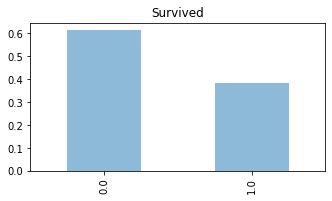

In [7]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3), (0,0))
df_all.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

## Replace the missing values with the medians of each group

In [8]:
# Age
df_all["Age"] = df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))

In [9]:
# Fare
df_all.loc[df_all["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [10]:
mr_thomas = df_all.loc[(df_all["Pclass"] == 3) & (df_all['SibSp'] == 0) & (df_all['Embarked'] == 'S')]['Fare'].median()
print(mr_thomas)
df_all.loc[df_all['Fare'].isnull(), 'Fare'] = mr_thomas

7.925


In [11]:
# Cabin
# NOTE: nunique() don't consider NaN
display(train['Cabin'].unique())
print("There are " + str(train['Cabin'].nunique()) + " different values for Cabin and " + str(train['Cabin'].isnull().sum()) + " cases are missing.")

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

There are 147 different values for Cabin and 687 cases are missing.


In [12]:
# Keep all first letters of cabin in a new variable and use 'M' for each missing
df_all['Deck'] = df_all["Cabin"].apply(lambda s: s[0] if pd.notnull(s) else 'M')

Text(0.5, 1.0, 'Survival rates for different cabins')

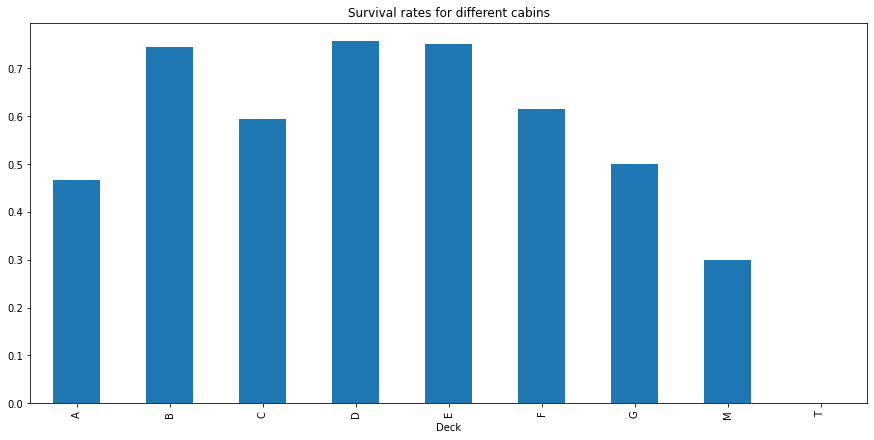

In [13]:
df_all[['Deck', 'Survived']].groupby('Deck')['Survived'].mean().plot(kind="bar", figsize=(15,7))
plt.title("Survival rates for different cabins")

In [14]:
# Grouping upper decks
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'
df_all['Deck'] = df_all['Deck'].replace(['A','B','C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [15]:
# Embarked
df_all.loc[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


In [16]:
df_all.loc[df_all['Embarked'].isnull(), 'Embarked'] = 'S'

In [17]:
# Double Check all values
display(df_all.isnull().sum())

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

##Feature Engineering

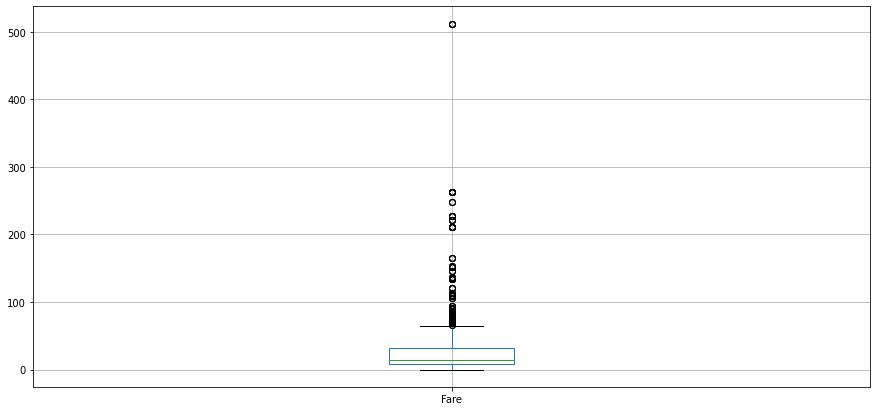

In [18]:
# Binning
df_all.boxplot(column=['Fare'], figsize=(15,7))

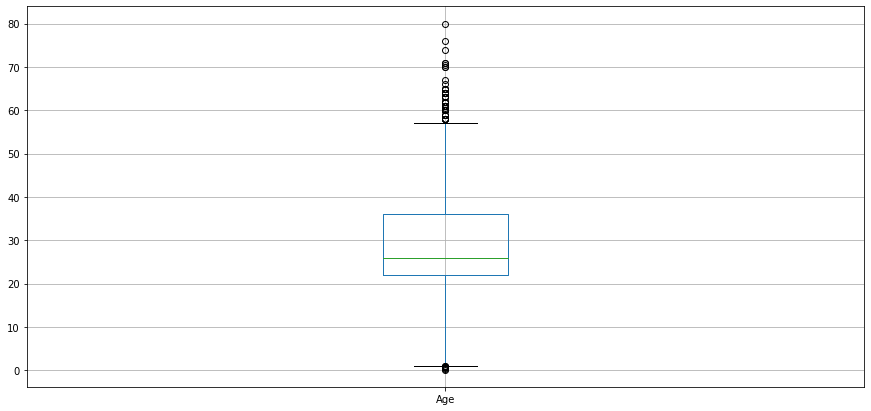

In [19]:
df_all.boxplot(column=['Age'], figsize=(15,7))

In [20]:
df_all["Fare"] = pd.qcut(df_all["Fare"], 5)
df_all["Age"] = pd.cut(df_all["Age"].astype(int), 5)

In [21]:
print("For age, each category has a different number of cases:")
df_all['Age'].value_counts()

For age, each category has a different number of cases:


(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age, dtype: int64

In [22]:
print("For fare, each category has nearly a same number of cases:")
df_all['Fare'].value_counts()

For fare, each category has nearly a same number of cases:


(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(10.5, 21.558]       255
(7.854, 10.5]        255
Name: Fare, dtype: int64

In [23]:
df_all[['Age','Survived']].groupby('Age')['Survived'].mean()

Age
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

In [24]:
df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean()

Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.558]       0.426901
(21.558, 41.579]     0.443243
(41.579, 512.329]    0.645349
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival rates for age categories')

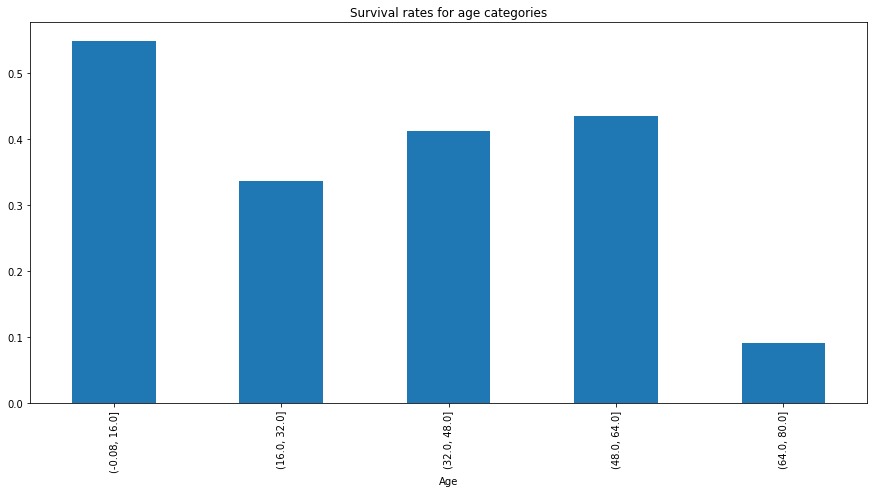

In [25]:
df_all[['Age','Survived']].groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.title("Survival rates for age categories")

Text(0.5, 1.0, 'Survival rates for fare categories')

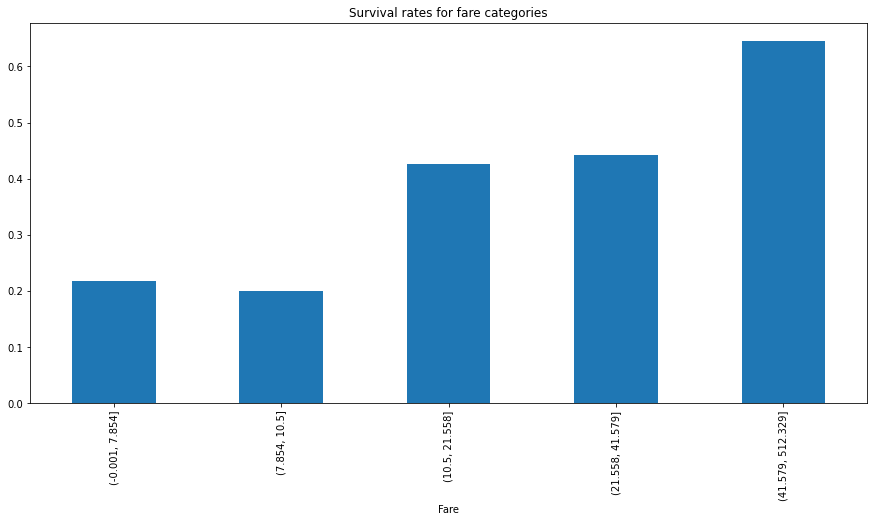

In [26]:
df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.title("Survival rates for fare categories")

## Create new features

In [27]:
# Family size
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

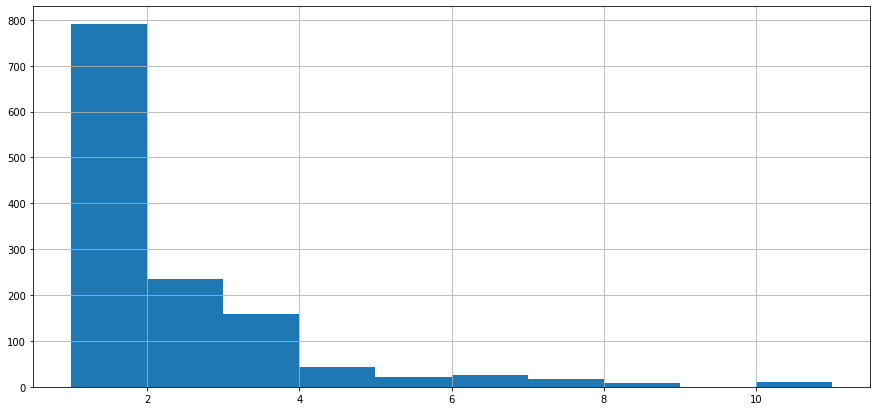

In [28]:
df_all["Family_Size"].hist(figsize=(15,7))

In [29]:
df_all['Family_Size_bin'] = df_all["Family_Size"].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s > 4 else 0))))

In [30]:
df_all['Family_Size_bin'].value_counts()

1    790
2    235
3    202
4     82
Name: Family_Size_bin, dtype: int64

Text(0.5, 1.0, 'Survival rates for family size categories')

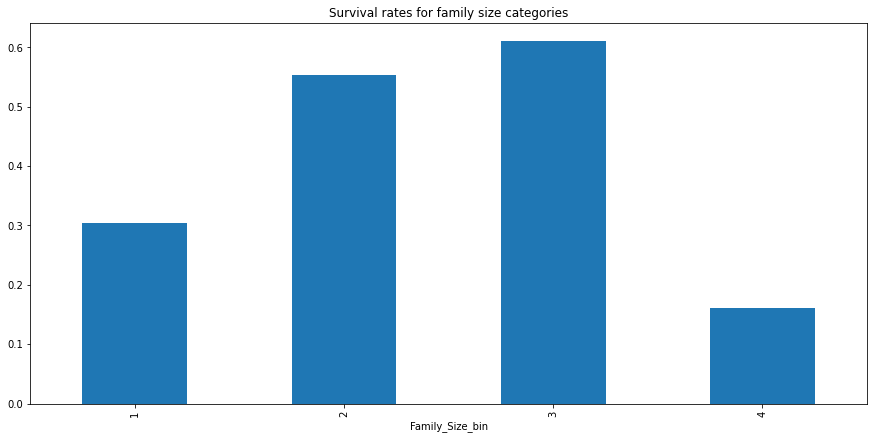

In [31]:
df_all[['Family_Size_bin', 'Survived']].groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.title("Survival rates for family size categories")

In [32]:
# Tickets
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

In [33]:
df_all[['Ticket_Frequency', 'Survived']].groupby('Ticket_Frequency').mean()

,Survived
Ticket_Frequency,
1,0.270270
2,0.513812
3,0.653465
4,0.727273
5,0.333333
6,0.210526
7,0.208333
8,0.384615
11,0.000000


In [37]:
# Title
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

In [39]:
df_all['Title'].nunique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


18

In [40]:
title_names = (df_all['Title'].value_counts() < 10)
df_all['Title'] = df_all['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
df_all.groupby('Title')['Title'].count() 

Title
Master     61
Misc       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

In [42]:
# Survival rates
import string

def extract_surname(data):
  families = []
  for i in range(len(data)):
    name = data.iloc[i]
    if '(' in name:
      name_no_bracket = name.split('(')[0]
    else:
      name_no_bracket = name
    family = name_no_bracket.split(',')[0]
    title = name_no_bracket.split(',')[1].strip().split(' ')[0]
    for c in string.punctuation:
      family = family.replace(c, '').strip()
    families.append(family)
  return families

df_all['Family'] = extract_surname(df_all['Name'])

In [43]:
df_all['Family'].nunique()

875

In [44]:
df_all[['Title', 'Survived', 'Family_Size']].groupby('Title').mean()

,Survived,Family_Size
Title,,
Master,0.575000,4.426230
Misc,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


Survival rates grouped by families of women in dataset


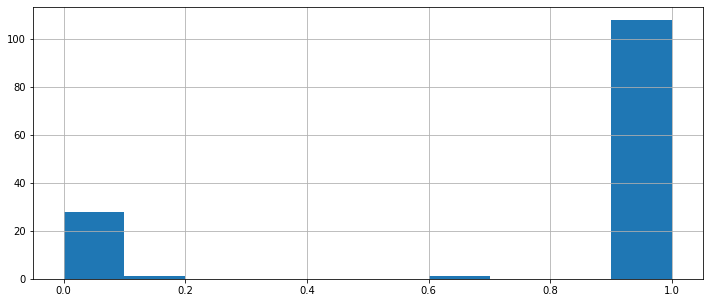

In [45]:
df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean().hist(figsize=(12,5))
print("Survival rates grouped by families of women in dataset")

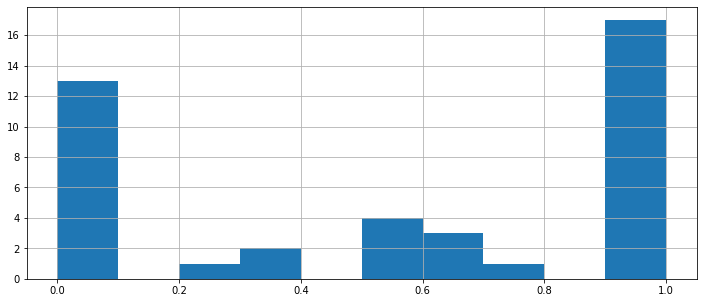

In [46]:
master_families = df_all.loc[df_all['Title'] == 'Master']['Family'].tolist()
df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean().hist(figsize=(12,5))

In [49]:
# Create variables with the survival rate of the women and masters
women_rate = df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean()
master_rate = df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()
# Combine both series
combined_rate = women_rate.append(master_rate)
# It is possible that a wome has the family as a master and vice versa, so duplicates have to be dropped
combined_rate_df = combined_rate.to_frame().reset_index().rename(columns={'Survived':'Survival_quota'}).drop_duplicates(subset='Family')
# Merge the new dataframe
df_all = pd.merge(df_all, combined_rate_df, how='left')

In [51]:
# we have calculated a survival rate for only a part of the cases, other cases we set to 0 in the dummy variable
df_all['Survival_quota_NA'] = 1
df_all.loc[df_all['Survival_quota'].isnull(), 'Survival_quota_NA'] = 0
df_all['Survival_quota'] = df_all["Survival_quota"].fillna(0)

## Label and one Hot Encoding

In [60]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Age', 'Fare', 'Deck']

for feature in non_numeric_features:
  df_all[feature] = preprocessing.LabelEncoder().fit_transform(df_all[feature])

cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family_Size_bin', 'Age', 'Fare']

encoded_features = []

for feature in cat_features:
  encoded_feat = preprocessing.OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1,1)).toarray()
  n = df_all[feature].nunique()
  cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
  encoded_df = pd.DataFrame(encoded_feat, columns=cols)
  encoded_df.index = df_all.index
  encoded_features.append(encoded_df)

df_all = pd.concat([df_all, *encoded_features], axis=1)


In [62]:
def divide_df(all_data):
  return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)
df_train, df_test = divide_df(df_all)

## Modelling and prediction



In [70]:
# Define columns which can be dropped for the modelling part because we created new label and one hot encoded variants out of them
drop_cols = ['Embarked', 'Family', 'Family_Size', 'Survived', 'Family_Size_bin', 'Deck', 'Age',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

drop_cols_2 = ['Embarked', 'Family', 'Family_Size', 'Family_Size_bin', 'Deck', 'Fare',
               'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

In [78]:
# Setting up random forest classifier
# Standardisation of variables
X = preprocessing.StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y = df_train['Survived'].values
X_test = preprocessing.StandardScaler().fit_transform(df_test.drop(columns=drop_cols_2))
# Creating train, test splits
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42)
# Defining model parameters
model = RandomForestClassifier(criterion='gini',
                               n_estimators=1750,
                               max_depth=7,
                               min_samples_split=6,
                               min_samples_leaf=6,
                               max_features='auto',
                               oob_score=True,
                               random_state=42,
                               n_jobs=-1,
                               verbose=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(model.score(X_test1, y_test1))
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('predictions.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

0.8654708520179372


[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished


## Download the data

In [79]:
from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>